<a href="https://colab.research.google.com/github/shivamjha-9/house-price-prediction/blob/main/House_Price_Prediction_with_Linear_Regression_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

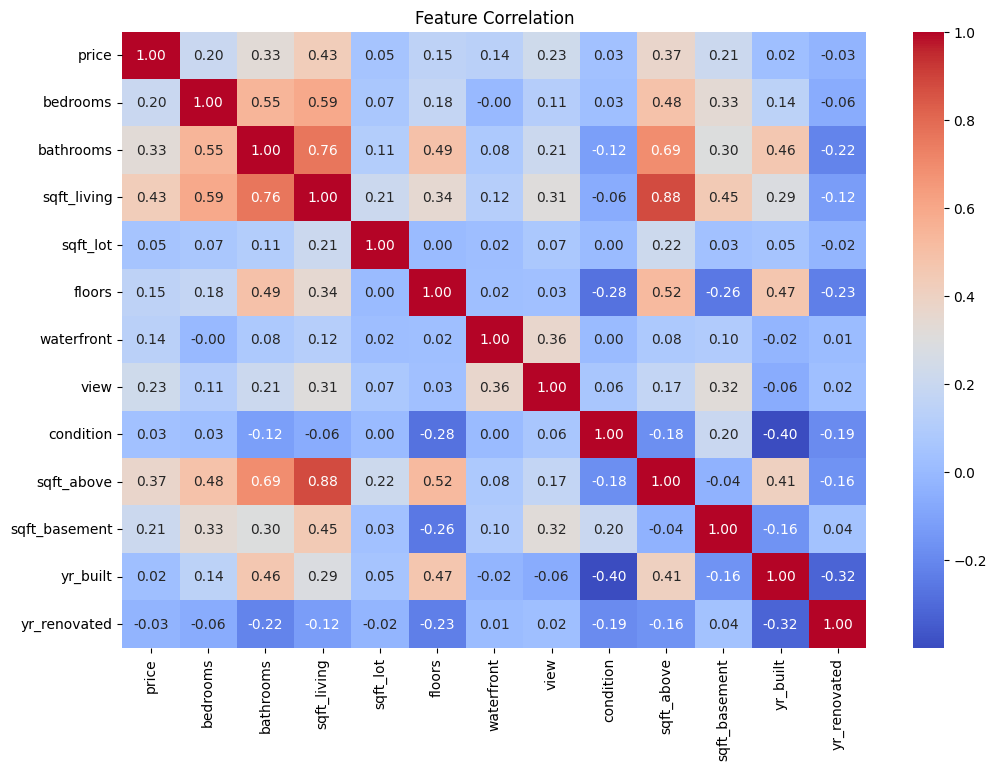

R² Score: 0.0323
RMSE: 993439.36


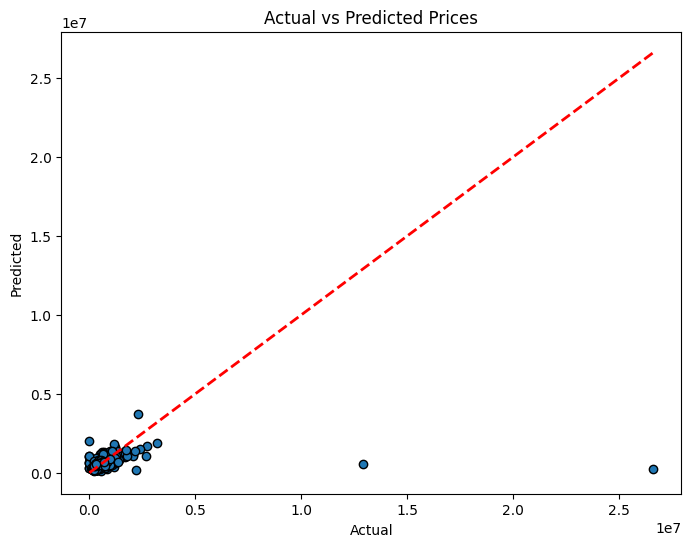

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("house.csv")  # Adjust filename if needed
print(df.head())

# Check for null values
print(df.isnull().sum())

# Basic EDA
# sns.pairplot(df) # This can take a long time with many features, commenting out for now
# plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation")
plt.show()

# Define features and target
X = numeric_df.drop('price', axis=1)  # 'price' is the target variable
y = numeric_df['price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Plotting predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

In [7]:
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')

# Calculate correlation with the 'price' column and sort
correlation = numeric_df.corr()['price'].sort_values()
print(correlation)

yr_renovated    -0.028774
yr_built         0.021857
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.151461
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.327110
sqft_above       0.367570
sqft_living      0.430410
price            1.000000
Name: price, dtype: float64


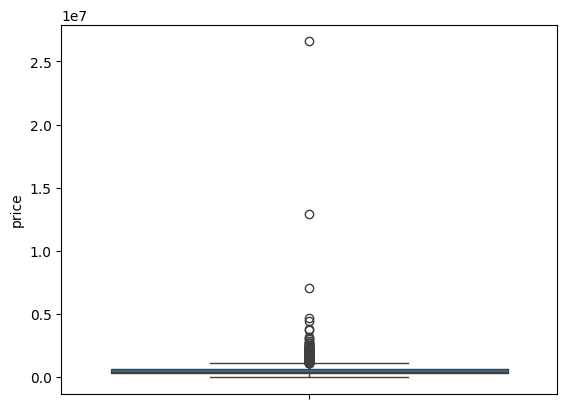

In [9]:
sns.boxplot(df['price'])  # Target column
plt.show()

In [11]:
# Remove outliers based on the 95th percentile of the 'price' column
df = df[df['price'] < df['price'].quantile(0.95)]
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (4370, 18)


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)


In [13]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge R²: 0.03229578853405746


In [14]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X_scaled, y, cv=10, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f}")


Cross-Validated R²: 0.5289


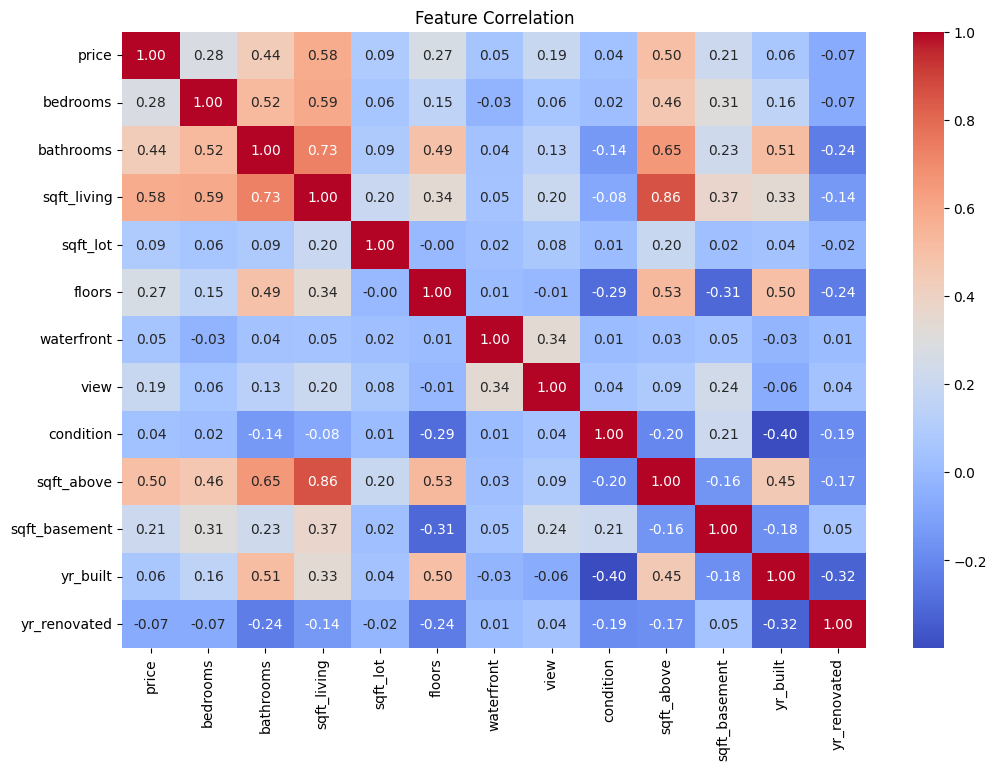

price            1.000000
sqft_living      0.580948
sqft_above       0.500958
bathrooms        0.436286
bedrooms         0.278387
floors           0.266870
sqft_basement    0.212560
view             0.194071
sqft_lot         0.093059
yr_built         0.061594
waterfront       0.051696
condition        0.036624
yr_renovated    -0.066256
Name: price, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation") # Changed title from MEDV to general
plt.show()

# Focus on features with strong correlation to price
corr_target = corr["price"].sort_values(ascending=False) # Changed MEDV to price
print(corr_target)

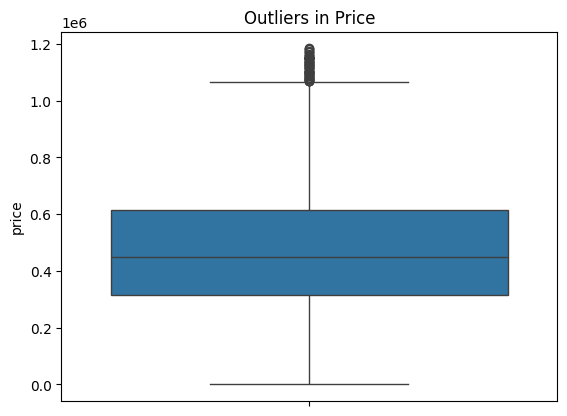

Dataset shape after removing outliers: (4149, 18)


In [18]:
# Visualize outliers
sns.boxplot(df['price'])
plt.title("Outliers in Price") # Changed title to reflect 'price'
plt.show()

# Remove top 5% outliers in target
df = df[df['price'] < df['price'].quantile(0.95)]
print(f"Dataset shape after removing outliers: {df.shape}")

In [21]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns from features X
X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
y = df["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Refined R² Score: {r2:.4f}")
print(f"Refined RMSE: ₹{rmse:,.2f}")


Refined R² Score: 0.3620
Refined RMSE: ₹147,401.76


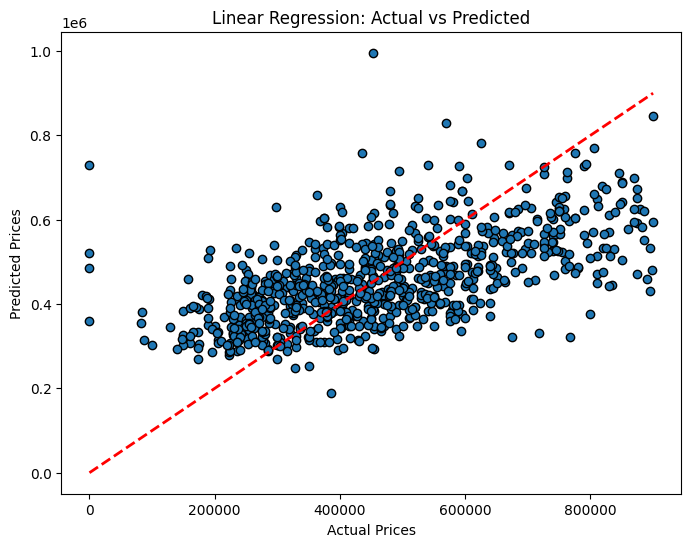

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()


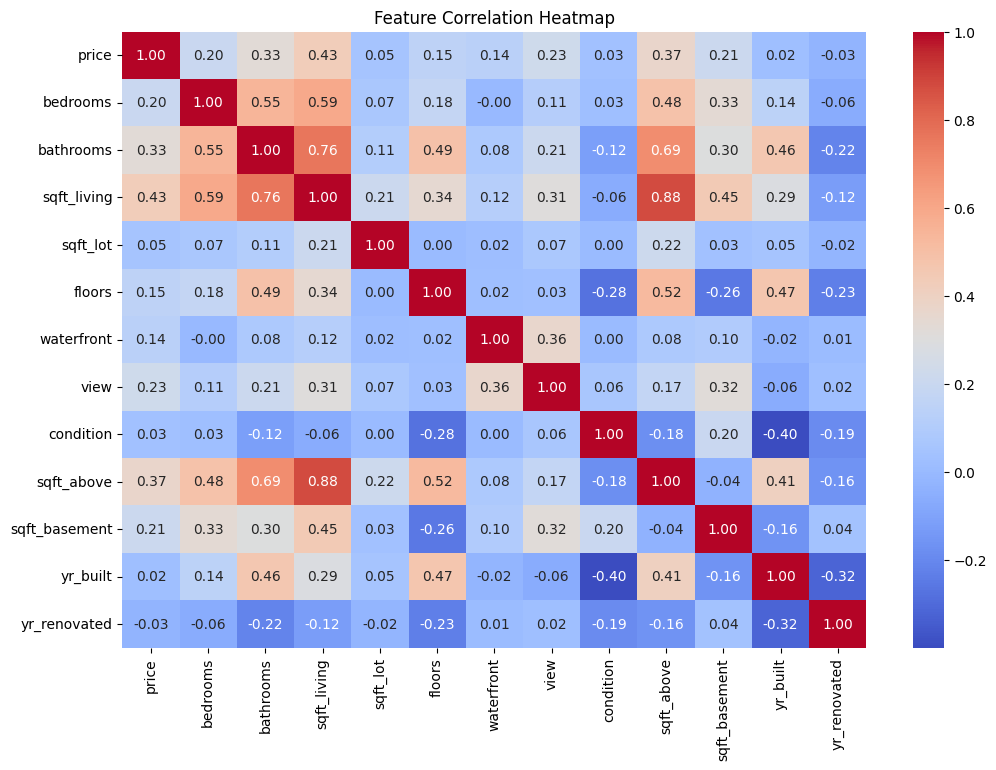

Correlation with price:
price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

Dataset shape after removing outliers in 'price': (4370, 18)

Refined R² Score: 0.4131
Refined RMSE: ₹172,031.78


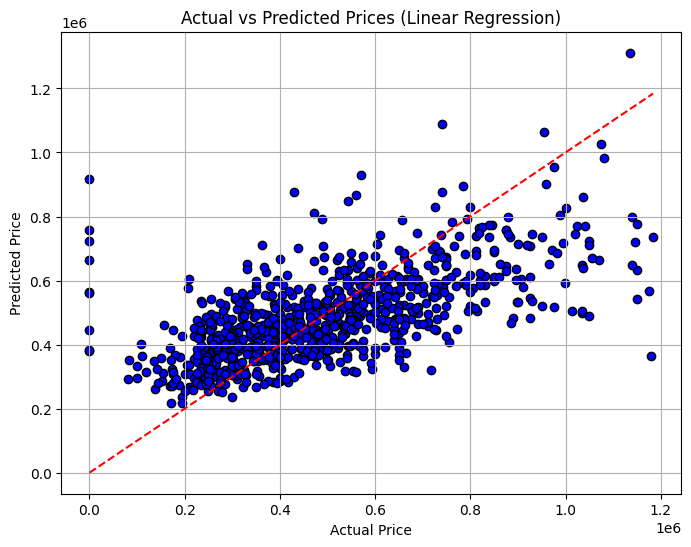

In [25]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("house.csv")  # Make sure 'house.csv' is in the same folder

# STEP 1: Remove rows with missing values (if any)
df.dropna(inplace=True)

# STEP 2: Correlation analysis
plt.figure(figsize=(12, 8))
# Drop non-numeric columns before calculating correlation
numeric_df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Print correlation of each feature with the target
print("Correlation with price:")
print(numeric_df.corr()["price"].sort_values(ascending=False))

# STEP 3: Remove outliers in target variable
# Check if 'price' column exists before proceeding
if 'price' in df.columns:
    upper_limit = df["price"].quantile(0.95)
    df = df[df["price"] < upper_limit]
    print(f"\nDataset shape after removing outliers in 'price': {df.shape}")
else:
    print("\n'price' column not found for outlier removal.")


# STEP 4: Split features and target
# Drop non-numeric columns from features X
X = df.drop(['price', 'date', 'street', 'city', 'statezip', 'country'], axis=1, errors='ignore')
y = df["price"]

# STEP 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# STEP 7: Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 8: Predict and evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nRefined R² Score: {r2:.4f}")
print(f"Refined RMSE: ₹{rmse:,.2f}")

# STEP 9: Visualization - Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.grid(True)
plt.show()

In [32]:
print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


🚀 Improved R² Score: 0.4122
📉 Improved RMSE: ₹172,157.98


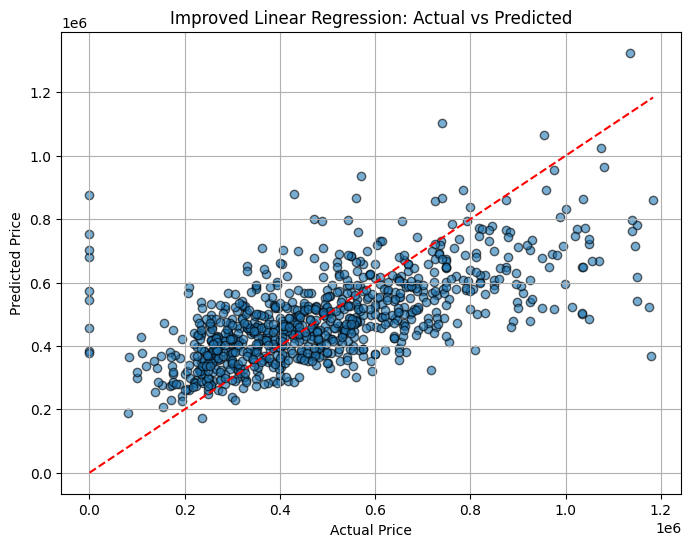

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("house.csv")

# Drop irrelevant columns
df.drop(columns=["date", "street", "city", "statezip", "country"], inplace=True)

# Remove missing data
df.dropna(inplace=True)

# Step 1: Drop price outliers (top 5%)
df = df[df["price"] < df["price"].quantile(0.95)]

# Step 2: One-hot encode categorical features
categorical = ["waterfront", "view", "condition", "floors"]
df = pd.get_dummies(df, columns=categorical, drop_first=True)

# Step 3: Define features and target
X = df.drop("price", axis=1)
y = df["price"]

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"🚀 Improved R² Score: {r2:.4f}")
print(f"📉 Improved RMSE: ₹{rmse:,.2f}")

# Step 8: Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Improved Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# STEP 1: Load your dataset
# Example: df = pd.read_csv("house_data.csv")
# Replace this with your dataset
# df = pd.read_csv("your_dataset.csv")

# STEP 2: Convert date to datetime and extract year_sold
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] = df['date'].dt.year

# STEP 3: Feature Engineering
df['house_age'] = df['year_sold'] - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: x['year_sold'] - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)

# STEP 4: Log Transform skewed features
df['log_price'] = np.log1p(df['price'])
df['log_sqft_living'] = np.log1p(df['sqft_living'])
df['log_sqft_lot'] = np.log1p(df['sqft_lot'])

# STEP 5: Remove Outliers
price_lower = df['price'].quantile(0.01)
price_upper = df['price'].quantile(0.99)
df = df[(df['price'] >= price_lower) & (df['price'] <= price_upper)]

sqft_upper = df['sqft_living'].quantile(0.99)
sqft_lower = df['sqft_living'].quantile(0.01)
df = df[(df['sqft_living'] >= sqft_lower) & (df['sqft_living'] <= sqft_upper)]

# STEP 6: Feature Set and Target
features = ['bedrooms', 'bathrooms', 'house_age', 'is_renovated', 'renovated_age',
            'total_rooms', 'lot_to_living_ratio', 'bathroom_per_bedroom',
            'log_sqft_living', 'log_sqft_lot']

X = df[features]
y = df['log_price']

# STEP 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 8: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 9: Model Training - ElasticNet with GridSearchCV
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
enet = ElasticNet(max_iter=5000, random_state=42)
grid = GridSearchCV(enet, params, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# STEP 10: Evaluation
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Convert back from log for RMSE
y_test_exp = np.expm1(y_test)
y_pred_test_exp = np.expm1(y_pred_test)

# Metrics
print("✅ Best Parameters:", grid.best_params_)
print("📈 Train R² Score:", r2_score(y_train, y_pred_train))
print("📊 Test R² Score:", r2_score(y_test, y_pred_test))
print("🧮 Test RMSE:", np.sqrt(mean_squared_error(y_test_exp, y_pred_test_exp)))


KeyError: 'date'

In [48]:
print(df.columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'waterfront_1', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'floors_1.5', 'floors_2.0',
       'floors_2.5', 'floors_3.0', 'floors_3.5'],
      dtype='object')


In [49]:
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,waterfront_1,...,view_4,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,313000.0,3.0,1.50,1340,7912,1340,0,1955,2005,False,...,False,False,True,False,False,True,False,False,False,False
2,342000.0,3.0,2.00,1930,11947,1930,0,1966,0,False,...,False,False,False,True,False,False,False,False,False,False
3,420000.0,3.0,2.25,2000,8030,1000,1000,1963,0,False,...,False,False,False,True,False,False,False,False,False,False
4,550000.0,4.0,2.50,1940,10500,1140,800,1976,1992,False,...,False,False,False,True,False,False,False,False,False,False
5,490000.0,2.0,1.00,880,6380,880,0,1938,1994,False,...,False,False,True,False,False,False,False,False,False,False


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# ⚠️ Load your data
# df = pd.read_csv("your_dataset.csv")

# STEP 1: Add synthetic year_sold (assume 2015)
df['year_sold'] = 2015

# STEP 2: Feature Engineering
df['house_age'] = df['year_sold'] - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: x['year_sold'] - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)

# STEP 3: Log transformation
df['log_price'] = np.log1p(df['price'])
df['log_sqft_living'] = np.log1p(df['sqft_living'])
df['log_sqft_lot'] = np.log1p(df['sqft_lot'])

# STEP 4: Remove outliers
df = df[df['sqft_living'].between(df['sqft_living'].quantile(0.01), df['sqft_living'].quantile(0.99))]
df = df[df['price'].between(df['price'].quantile(0.01), df['price'].quantile(0.99))]

# STEP 5: Select features
base_features = ['bedrooms', 'bathrooms', 'house_age', 'is_renovated', 'renovated_age',
                 'total_rooms', 'lot_to_living_ratio', 'bathroom_per_bedroom',
                 'log_sqft_living', 'log_sqft_lot']

# Add True/False dummy columns
dummy_features = [col for col in df.columns if df[col].dtype == bool]

# Combine all features
all_features = base_features + dummy_features
X = df[all_features]
y = df['log_price']

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 8: ElasticNet with GridSearchCV
params = {'alpha': [0.1, 0.5, 1.0, 5.0], 'l1_ratio': [0.1, 0.5, 0.9]}
model = ElasticNet(max_iter=5000, random_state=42)
grid = GridSearchCV(model, params, cv=5, scoring='r2')
grid.fit(X_train_scaled, y_train)

# STEP 9: Evaluation
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train_scaled)
y_pred_test = best_model.predict(X_test_scaled)

# Convert log back to original price
y_test_exp = np.expm1(y_test)
y_pred_test_exp = np.expm1(y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_test_exp))

# STEP 10: Results
print("✅ Best Parameters:", grid.best_params_)
print("📈 Train R² Score:", r2_score(y_train, y_pred_train))
print("📊 Test R² Score:", r2_score(y_test, y_pred_test))
print("🧮 Test RMSE:", rmse)


✅ Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
📈 Train R² Score: 0.40036768107255316
📊 Test R² Score: 0.41247825986437237
🧮 Test RMSE: 147755.33573355197


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# df = pd.read_csv("your_dataset.csv")

# Assume sold year
df['year_sold'] = 2015

# Feature engineering
df['house_age'] = df['year_sold'] - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: x['year_sold'] - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)

# Remove outliers
df = df[df['sqft_living'].between(df['sqft_living'].quantile(0.01), df['sqft_living'].quantile(0.99))]
df = df[df['price'].between(df['price'].quantile(0.01), df['price'].quantile(0.99))]

# Select features
base_features = ['bedrooms', 'bathrooms', 'house_age', 'is_renovated', 'renovated_age',
                 'total_rooms', 'lot_to_living_ratio', 'bathroom_per_bedroom',
                 'sqft_living', 'sqft_lot']

# Include boolean columns
bool_features = [col for col in df.columns if df[col].dtype == bool]
all_features = base_features + bool_features

X = df[all_features]
y = df['price']  # ✅ Use original price now

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 R² Score:", r2)
print("🧮 RMSE:", rmse)


📈 R² Score: 0.4095545844270051
🧮 RMSE: 141850.58111506567


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data.csv")

# Drop high-cardinality columns
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Feature engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)

# Drop 'yr_renovated' (already used above)
df = df.drop(['yr_renovated'], axis=1)

# Remove outliers
df = df[df['price'] < df['price'].quantile(0.99)]

# Define features
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'house_age',
            'is_renovated', 'renovated_age', 'total_rooms',
            'lot_to_living_ratio', 'bathroom_per_bedroom']

# Add boolean columns if any
bool_cols = [col for col in df.columns if df[col].dtype == bool]
X = df[features + bool_cols]
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Linear Regression R² Score:", r2)
print("📉 Linear Regression RMSE:", rmse)


📈 Linear Regression R² Score: 0.4737621137379793
📉 Linear Regression RMSE: 210878.22873769017


In [58]:
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['bath_x_bed'] = df['bathrooms'] * df['bedrooms']
df['living_per_room'] = df['sqft_living'] / df['total_rooms'].replace(0, 1)


In [59]:
cor = df.corr()['price'].sort_values(ascending=False)
print(cor)


price                   1.000000
sqft_living             0.640195
sqft_above              0.546963
bathrooms               0.484934
bath_x_bed              0.472874
total_rooms             0.447791
living_per_room         0.446292
sqft_living_x_age       0.334814
view                    0.319725
bedrooms                0.316468
floors                  0.275813
sqft_basement           0.272809
bathroom_per_bedroom    0.247832
sqft_lot                0.081176
waterfront              0.079514
condition               0.052519
yr_built                0.032918
renovated_age          -0.003743
house_age              -0.032918
lot_to_living_ratio    -0.045833
is_renovated           -0.051539
Name: price, dtype: float64


In [60]:
selected_features = [
    'sqft_living', 'sqft_above', 'bathrooms', 'bath_x_bed',
    'total_rooms', 'living_per_room', 'sqft_living_x_age',
    'view', 'bedrooms', 'floors', 'sqft_basement'
]


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("data.csv")
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Feature engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['bath_x_bed'] = df['bathrooms'] * df['bedrooms']
df['living_per_room'] = df['sqft_living'] / df['total_rooms'].replace(0, 1)

# Drop unimportant features
df = df[df['price'] < df['price'].quantile(0.99)]  # Remove outliers

# Final selected features based on correlation
selected_features = [
    'sqft_living', 'sqft_above', 'bathrooms', 'bath_x_bed',
    'total_rooms', 'living_per_room', 'sqft_living_x_age',
    'view', 'bedrooms', 'floors', 'sqft_basement'
]

X = df[selected_features]
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict & evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ FINAL Linear Regression R² Score:", r2)
print("📉 FINAL Linear Regression RMSE:", rmse)


✅ FINAL Linear Regression R² Score: 0.49642882568075697
📉 FINAL Linear Regression RMSE: 206286.64861087364


In [62]:
y = np.log(df['price'])


In [63]:
y_pred = np.exp(model.predict(X_test_scaled))


In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("data.csv")
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Feature engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['bath_x_bed'] = df['bathrooms'] * df['bedrooms']
df['living_per_room'] = df['sqft_living'] / df['total_rooms'].replace(0, 1)

# Remove outliers and rows with price <= 0 *before* log transform
df = df[df['price'] > 0] # Remove rows with price 0 or less
df = df[df['price'] < df['price'].quantile(0.99)]

# Final feature selection
selected_features = [
    'sqft_living', 'sqft_above', 'bathrooms', 'bath_x_bed',
    'total_rooms', 'living_per_room', 'sqft_living_x_age',
    'view', 'bedrooms', 'floors', 'sqft_basement'
]

X = df[selected_features]

# ✅ Transform target using log (now that price > 0 is guaranteed)
y = np.log(df['price'])

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict (in log scale)
y_pred_log = model.predict(X_test_scaled)

# ✅ Evaluate in log scale
r2_log = r2_score(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

# ✅ Convert predictions back to actual price
y_test_actual = np.exp(y_test)
y_pred_actual = np.exp(y_pred_log)

# ✅ Evaluate in original scale
r2_actual = r2_score(y_test_actual, y_pred_actual)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

# Results
print("📈 R² Score (log scale):", r2_log)
print("📉 RMSE (log scale):", rmse_log)
print("✅ R² Score (actual price):", r2_actual)
print("💰 RMSE (actual price):", rmse_actual)

📈 R² Score (log scale): 0.450275372028932
📉 RMSE (log scale): 0.36492591581691386
✅ R² Score (actual price): -0.8114475972334165
💰 RMSE (actual price): 375658.3881282026


In [73]:
# Replace earlier y and predictions section with this:

y = np.log1p(df['price'])  # Step 1

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict in log1p scale
y_pred_log = model.predict(X_test_scaled)

# Evaluation in log1p space
r2_log = r2_score(y_test, y_pred_log)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))

# Convert to original price space
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# Final Evaluation
r2_actual = r2_score(y_test_actual, y_pred_actual)
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))

print("📈 R² Score (log1p scale):", r2_log)
print("📉 RMSE (log1p scale):", rmse_log)
print("✅ R² Score (actual price):", r2_actual)
print("💰 RMSE (actual price):", rmse_actual)


📈 R² Score (log1p scale): 0.45027615362479045
📉 RMSE (log1p scale): 0.3649247815907506
✅ R² Score (actual price): -0.8113722330581827
💰 RMSE (actual price): 375650.5735275739


In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Load and clean data
df = pd.read_csv("data.csv")
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Feature engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['bath_x_bed'] = df['bathrooms'] * df['bedrooms']
df['living_per_room'] = df['sqft_living'] / df['total_rooms'].replace(0, 1)

# Remove outliers
df = df[df['price'] < df['price'].quantile(0.99)]

# Selected features
features = [
    'sqft_living', 'sqft_above', 'bathrooms', 'bath_x_bed',
    'total_rooms', 'living_per_room', 'sqft_living_x_age',
    'view', 'bedrooms', 'floors', 'sqft_basement'
]

X = df[features]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🚀 Ridge Regression with Polynomial Features:")
print("📈 R² Score:", r2)
print("📉 RMSE:", rmse)


🚀 Ridge Regression with Polynomial Features:
📈 R² Score: 0.37627155807836
📉 RMSE: 229582.33222092426


In [75]:
from sklearn.linear_model import RidgeCV

# Ridge with alpha tuning
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge_cv.fit(X_train_poly, y_train)

y_pred = ridge_cv.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Best Alpha:", ridge_cv.alpha_)
print("📈 Tuned Ridge R² Score:", r2)
print("📉 Tuned Ridge RMSE:", rmse)


✅ Best Alpha: 100.0
📈 Tuned Ridge R² Score: 0.48323514881593643
📉 Tuned Ridge RMSE: 208971.55409396725


In [76]:
# Add squared features manually
df['sqft_living_sq'] = df['sqft_living'] ** 2
df['bathrooms_sq'] = df['bathrooms'] ** 2
df['total_rooms_sq'] = df['total_rooms'] ** 2

# Final features
final_features = [
    'sqft_living', 'bathrooms', 'total_rooms',
    'sqft_living_sq', 'bathrooms_sq', 'total_rooms_sq',
    'bath_x_bed', 'living_per_room', 'sqft_living_x_age',
    'view', 'floors', 'sqft_basement'
]

X = df[final_features]
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RidgeCV
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0, 200.0], cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict
y_pred = ridge_cv.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Final RidgeCV Model")
print("Best Alpha:", ridge_cv.alpha_)
print("R² Score:", r2)
print("RMSE:", rmse)


✅ Final RidgeCV Model
Best Alpha: 10.0
R² Score: 0.49424567014960175
RMSE: 206733.32705864595


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("data.csv")
df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

# Feature Engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] == 1 else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['lot_to_living_ratio'] = df['sqft_lot'] / df['sqft_living']
df['bathroom_per_bedroom'] = df['bathrooms'] / df['bedrooms'].replace(0, 1)
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['bath_x_bed'] = df['bathrooms'] * df['bedrooms']
df['living_per_room'] = df['sqft_living'] / df['total_rooms'].replace(0, 1)
df['sqft_living_sq'] = df['sqft_living'] ** 2
df['bathrooms_sq'] = df['bathrooms'] ** 2
df['total_rooms_sq'] = df['total_rooms'] ** 2

# Remove outliers
df = df[df['price'] < df['price'].quantile(0.99)]

# Final feature list
features = [
    'sqft_living', 'bathrooms', 'total_rooms',
    'sqft_living_sq', 'bathrooms_sq', 'total_rooms_sq',
    'bath_x_bed', 'living_per_room', 'sqft_living_x_age',
    'view', 'floors', 'sqft_basement', 'house_age',
    'lot_to_living_ratio', 'bathroom_per_bedroom',
    'is_renovated', 'renovated_age'
]

X = df[features]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 R² Score:", r2)
print("📉 RMSE:", rmse)


📈 R² Score: 0.4956501773497969
📉 RMSE: 206446.07265971543


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Load data
df = pd.read_csv("data.csv")
df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

# Feature Engineering
df['house_age'] = 2015 - df['yr_built']
df['is_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['renovated_age'] = df.apply(lambda x: 2015 - x['yr_renovated'] if x['is_renovated'] else 0, axis=1)
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df['sqft_ratio'] = df['sqft_living'] / (df['sqft_above'] + 1)
df['bath_bed_ratio'] = df['bathrooms'] / (df['bedrooms'] + 1)
df['sqft_living_x_age'] = df['sqft_living'] * df['house_age']
df['basement_ratio'] = df['sqft_basement'] / (df['sqft_living'] + 1)

# Remove price outliers
df = df[df['price'] < df['price'].quantile(0.99)]

# Final clean and powerful feature set
features = [
    'sqft_living', 'bathrooms', 'bedrooms', 'floors', 'view',
    'sqft_basement', 'house_age', 'is_renovated', 'renovated_age',
    'total_rooms', 'sqft_ratio', 'bath_bed_ratio',
    'sqft_living_x_age', 'basement_ratio'
]

X = df[features]
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression with degree 2
model = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 FINAL Polynomial Linear Regression")
print("✅ R² Score:", r2)
print("📉 RMSE:", rmse)


📈 FINAL Polynomial Linear Regression
✅ R² Score: 0.45631392694318706
📉 RMSE: 214345.70882529035
